In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.utils.functions import *

Actual min length: 5000
Frame shape: (480, 640)
Max length (center): 50000
Min length (corners): 5000.0

Length array shape: (480, 640)
Center pixel length: 50000.00
Corner pixel length: 5000.00


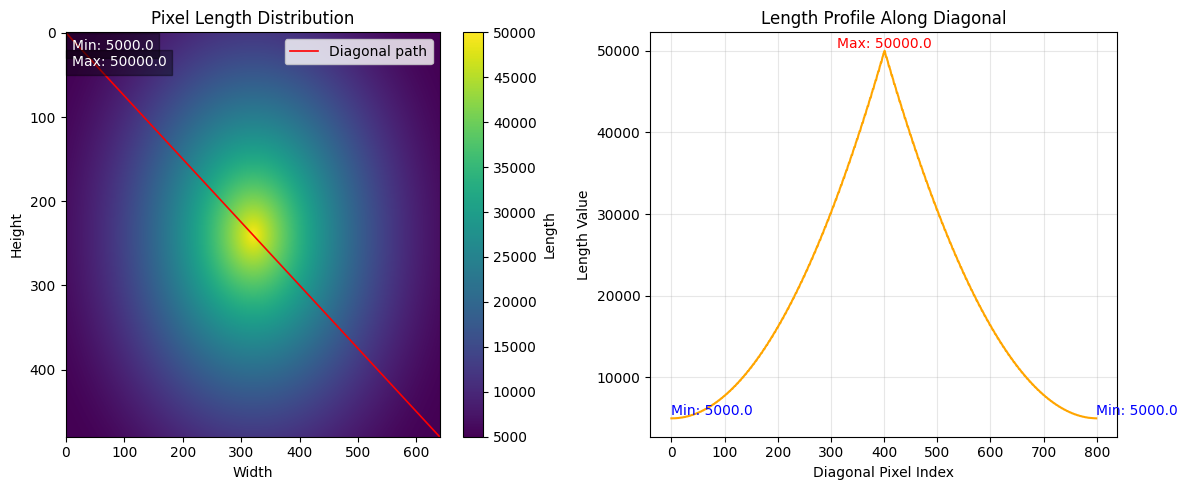

In [2]:

# Example usage
if __name__ == "__main__":
    # Test with a frame
    frame_shape = (480, 640)  # Height x Width (standard video resolution)
    max_length = 50000
    H, W = frame_shape
    
    # pixel_lengths = calculate_pixel_lengths(frame_shape, max_length, min_length=max_length/1000)
    pixel_lengths = calculate_pixel_lengths_power(frame_shape, max_length, min_length=max_length/10, gamma=2.0) 
    print("Actual min length:", pixel_lengths.min())
    
    print(f"Frame shape: {frame_shape}")
    print(f"Max length (center): {max_length}")
    print(f"Min length (corners): {max_length/10}")
    print(f"\nLength array shape: {pixel_lengths.shape}")
    print(f"Center pixel length: {pixel_lengths[frame_shape[0]//2, frame_shape[1]//2]:.2f}")
    print(f"Corner pixel length: {pixel_lengths[0, 0]:.2f}")
    
    
    
    # ---- Get full diagonal (hypotenuse) coordinates ----
    L = int(np.hypot(H, W))  # ≈800 pixels
    x = np.linspace(0, W - 1, L)
    y = np.linspace(0, H - 1, L)
    coords = np.stack((y.astype(int), x.astype(int)), axis=-1)

    # ---- Extract the pixel length values along that diagonal ----
    diag_lengths = pixel_lengths[y.astype(int), x.astype(int)]
    
    
    # Visualize the length distribution
    plt.figure(figsize=(12, 5))

    # --- Left: 2D heatmap ---
    plt.subplot(1, 2, 1)
    im = plt.imshow(pixel_lengths, cmap='viridis', aspect='auto')
    plt.plot(x, y, color='red', linewidth=1.2, label='Diagonal path')
    plt.colorbar(im, label='Length')
    plt.title('Pixel Length Distribution')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.legend()

    # show numeric min/max on the heatmap
    min_val = pixel_lengths.min()
    max_val = pixel_lengths.max()
    plt.text(10, 20, f"Min: {min_val:.1f}", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.4))
    plt.text(10, 40, f"Max: {max_val:.1f}", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.4))

    # --- Right: diagonal profile ---
    plt.subplot(1, 2, 2)
    plt.plot(diag_lengths, color='orange')
    plt.title('Length Profile Along Diagonal')
    plt.xlabel('Diagonal Pixel Index')
    plt.ylabel('Length Value')
    plt.grid(True, alpha=0.3)

    # show numeric min/max directly on the line plot
    plt.text(0, diag_lengths[0], f"Min: {diag_lengths[0]:.1f}", color='blue', fontsize=10, va='bottom')
    plt.text(len(diag_lengths)-1, diag_lengths[-1], f"Min: {diag_lengths[-1]:.1f}", color='blue', fontsize=10, va='bottom')
    plt.text(np.argmax(diag_lengths), diag_lengths.max(), f"Max: {diag_lengths.max():.1f}", 
            color='red', fontsize=10, va='bottom', ha='center')

    plt.tight_layout()
    plt.show()

Actual min length (rational): 7114
Frame shape: (480, 640)
Max length (center): 50000
Min length (corners): 5000.0

Length array shape: (480, 640)
Center pixel length: 50000.00
Corner pixel length: 7114.00


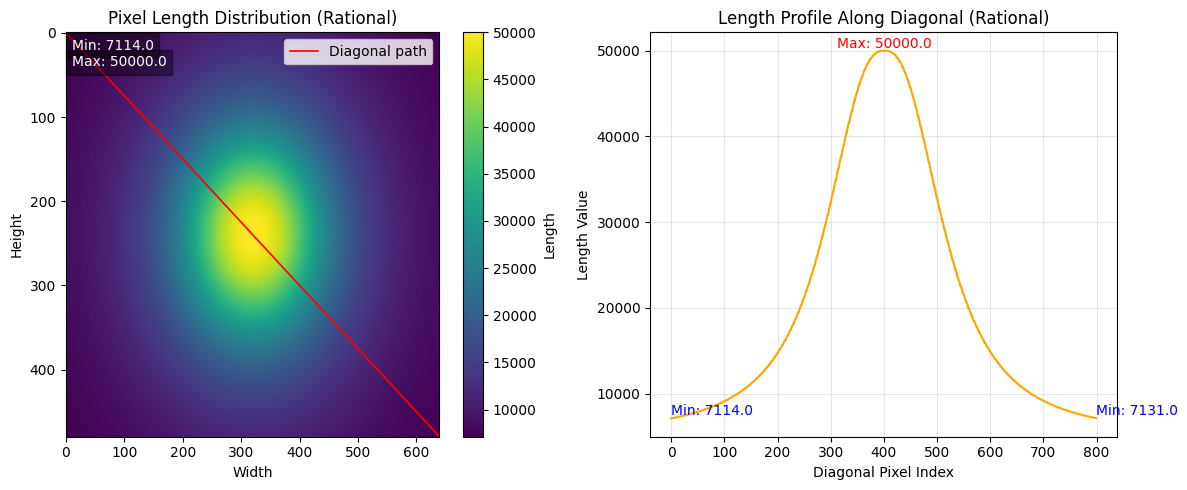

In [3]:
# Example usage for calculate_pixel_lengths_rational
frame_shape = (480, 640)  # Height x Width (standard video resolution)
max_length = 50000
H, W = frame_shape

pixel_lengths_rational = calculate_pixel_lengths_rational(frame_shape, max_length, min_length=max_length/10, r0=0.3, gamma=2.5)
print("Actual min length (rational):", pixel_lengths_rational.min())

print(f"Frame shape: {frame_shape}")
print(f"Max length (center): {max_length}")
print(f"Min length (corners): {max_length/10}")
print(f"\nLength array shape: {pixel_lengths_rational.shape}")
print(f"Center pixel length: {pixel_lengths_rational[frame_shape[0]//2, frame_shape[1]//2]:.2f}")
print(f"Corner pixel length: {pixel_lengths_rational[0, 0]:.2f}")

# ---- Get full diagonal (hypotenuse) coordinates ----
L = int(np.hypot(H, W))  # ≈800 pixels
x = np.linspace(0, W - 1, L)
y = np.linspace(0, H - 1, L)
coords = np.stack((y.astype(int), x.astype(int)), axis=-1)

# ---- Extract the pixel length values along that diagonal ----
diag_lengths_rational = pixel_lengths_rational[y.astype(int), x.astype(int)]

# Visualize the length distribution
plt.figure(figsize=(12, 5))

# --- Left: 2D heatmap ---
plt.subplot(1, 2, 1)
im = plt.imshow(pixel_lengths_rational, cmap='viridis', aspect='auto')
plt.plot(x, y, color='red', linewidth=1.2, label='Diagonal path')
plt.colorbar(im, label='Length')
plt.title('Pixel Length Distribution (Rational)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()

# show numeric min/max on the heatmap
min_val = pixel_lengths_rational.min()
max_val = pixel_lengths_rational.max()
plt.text(10, 20, f"Min: {min_val:.1f}", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.4))
plt.text(10, 40, f"Max: {max_val:.1f}", color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.4))

# --- Right: diagonal profile ---
plt.subplot(1, 2, 2)
plt.plot(diag_lengths_rational, color='orange')
plt.title('Length Profile Along Diagonal (Rational)')
plt.xlabel('Diagonal Pixel Index')
plt.ylabel('Length Value')
plt.grid(True, alpha=0.3)

# show numeric min/max directly on the line plot
plt.text(0, diag_lengths_rational[0], f"Min: {diag_lengths_rational[0]:.1f}", color='blue', fontsize=10, va='bottom')
plt.text(len(diag_lengths_rational)-1, diag_lengths_rational[-1], f"Min: {diag_lengths_rational[-1]:.1f}", color='blue', fontsize=10, va='bottom')
plt.text(np.argmax(diag_lengths_rational), diag_lengths_rational.max(), f"Max: {diag_lengths_rational.max():.1f}", 
        color='red', fontsize=10, va='bottom', ha='center')

plt.tight_layout()
plt.show()